Hoja de trabajo 2 DataScience - Series de tiempo

Andree Toledo
Andres Quinto 18288



In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.cm as cm
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from apyori import apriori
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
pd.set_option('display.max_rows', None)

Analisis Exploratorio

In [85]:
IMPORT = pd.read_excel('./IMPORTACION-VOLUMEN-2022-05.xlsx', skiprows=6)
CONSUME = pd.read_excel('./CONSUMO-2022-05.xlsx', skiprows=6)
# print(IMPORT.columns)
# print(CONSUME.columns)

Pequeño fix para nombres de la columna

In [86]:
IMPORT.rename(columns={'Gasolina superior': 'Gasolinasuperior','Gasolina regular': 'Gasolinaregular'}, inplace=True)
CONSUME.rename(columns={'Gasolina superior': 'Gasolinasuperior','Gasolina regular': 'Gasolinaregular'}, inplace=True)

In [87]:
Relevantes=['Fecha', 'Gasolinasuperior', 'Gasolinaregular', 'Diesel']
SinFecha=['Gasolina superior', 'Gasolina regular', 'Diesel']
consumes = CONSUME[Relevantes]
imports = IMPORT[Relevantes]


# a partir de la linea 264 ya no se toma en relevancia para la interpretacion de datos
CONSUME = CONSUME[:264]
IMPORT = IMPORT[:264]
consumes = consumes[:270]
imports = imports[:270]

In [88]:
consumes.head(15)

,Fecha,Gasolinasuperior,Gasolinaregular,Diesel
0,2000-01-01 00:00:00,308156.82,202645.2,634667.06
1,2000-02-01 00:00:00,307766.31,205530.96,642380.66
2,2000-03-01 00:00:00,331910.29,229499.56,699807.25
3,2000-04-01 00:00:00,315648.08,210680.4,586803.98
4,2000-05-01 00:00:00,319667.97,208164.34,656948.2
5,2000-06-01 00:00:00,300347.7,195088.74,570919.88
6,2000-07-01 00:00:00,308305.93,204556.77,576436.02
7,2000-08-01 00:00:00,323011.86,218388.51,593770.77
8,2000-09-01 00:00:00,326455.72,213906.96,590145.4
9,2000-10-01 00:00:00,323843.63,213606.65,641113.36


In [89]:
consumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Fecha             270 non-null    object
 1   Gasolinasuperior  270 non-null    object
 2   Gasolinaregular   270 non-null    object
 3   Diesel            270 non-null    object
dtypes: object(4)
memory usage: 8.6+ KB


In [90]:
imports.head(15)


,Fecha,Gasolinasuperior,Gasolinaregular,Diesel
0,2001-01-01,373963.96,177776.5,566101.99
1,2001-02-01,243091.07,123115.99,489525.8
2,2001-03-01,312084.38,161726.42,575559.68
3,2001-04-01,285054.89,127338.74,437745.42
4,2001-05-01,300913.67,168730.19,552609.13
5,2001-06-01,333217.19,152899.09,497855.26
6,2001-07-01,195071.86,136299.13,302350.02
7,2001-08-01,268153.26,139365.07,464159.13
8,2001-09-01,308439.07,233643.75,321952.94
9,2001-10-01,305102.28,141550.22,438989.55


In [91]:
imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             264 non-null    datetime64[ns]
 1   Gasolinasuperior  264 non-null    object        
 2   Gasolinaregular   264 non-null    object        
 3   Diesel            264 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 8.6+ KB


DATOS Y LIMPIEZA

Los data sets contienen un resumen acerca del consumo e importacion de la gasolina en Guatemala en el periodo de enero 2001 hasta junio del 2022.

Informacion como: galones de gasolina de super, regular y diesel consumidos e importados.

EXPLORACION DE DATOS:

Nuestras variables de interes son todas continuas (Super, regular, diesel y fecha). Para determinar su distribucion realizamos sus graficos correspondientes mas histogramas.

Los datos presentan un sesgo hacia la derecha y no una distribucion normal.

PARA IMPORTACION

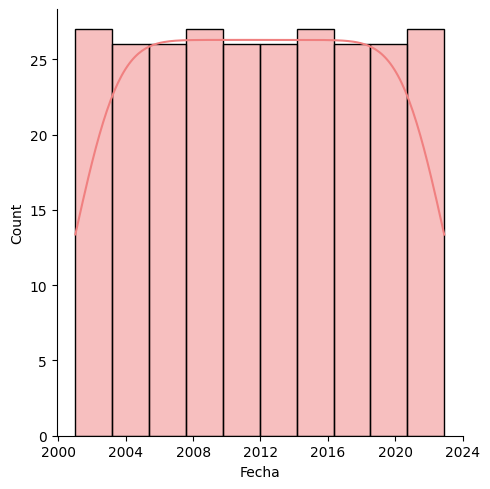

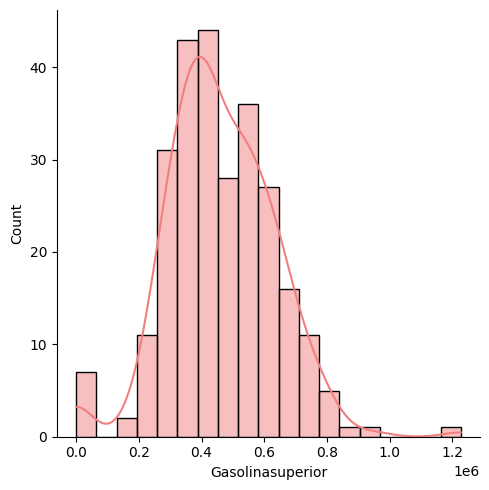

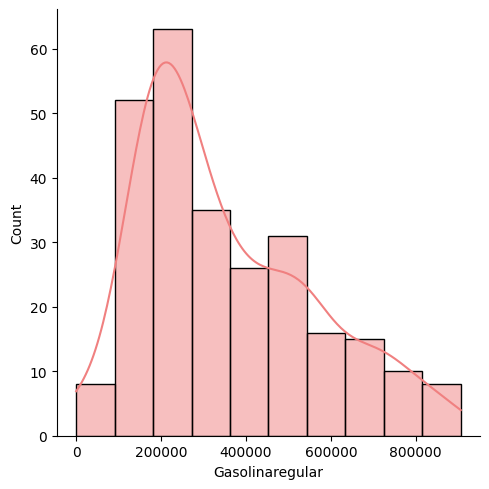

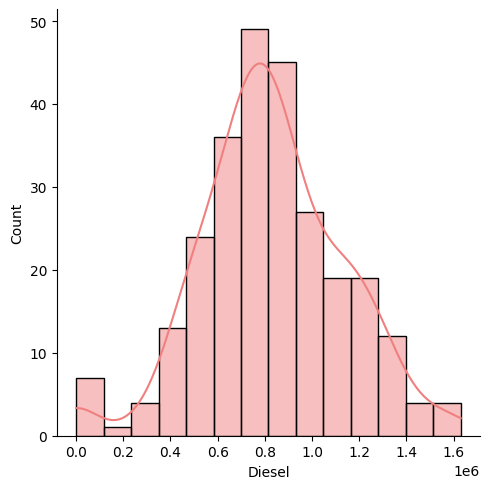

In [92]:
for var in Relevantes:
    sns.displot(imports[var], kde=True, color = 'lightcoral')

PARA CONSUMOS

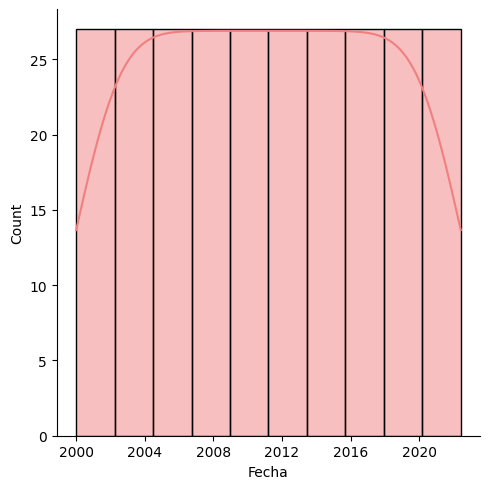

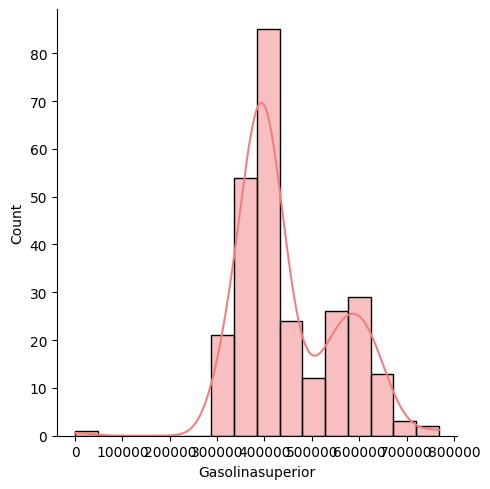

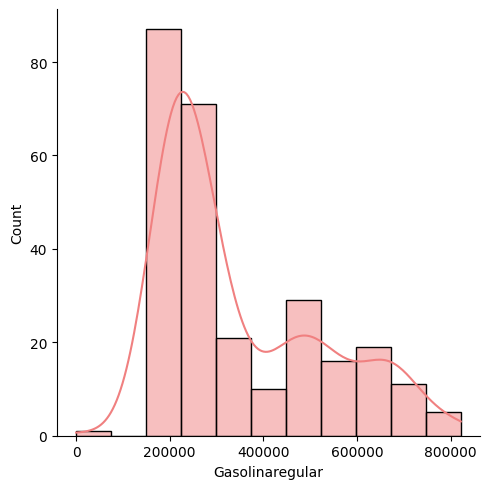

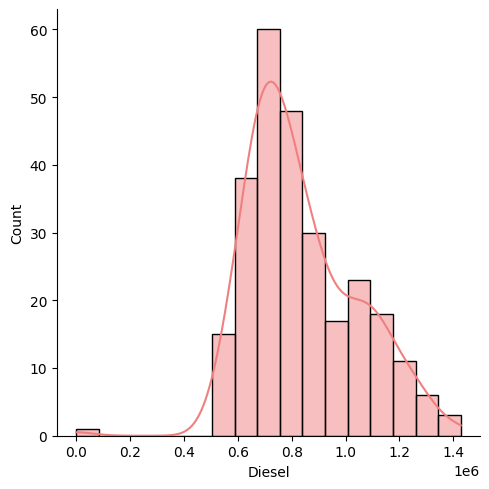

In [93]:
for var in Relevantes:
    sns.displot(consumes[var], kde=True, color='lightcoral')

(array([  1.,   1., 113.,  56.,  10.,  28.,  25.,  11.,  19.,   6.]),
 array([0.0, 82188.215, 164376.43, 246564.645, 328752.86,
        410941.07499999995, 493129.29, 575317.505, 657505.72,
        739693.9349999999, 821882.15], dtype=object),
 <BarContainer object of 10 artists>)

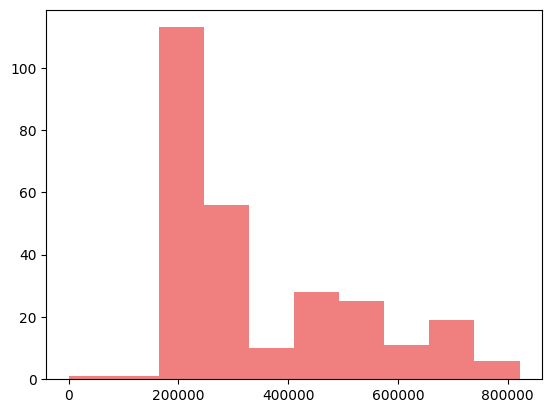

In [94]:
plt.hist(consumes.Gasolinaregular, color="lightcoral")

(array([  1.,   0.,   0.,   3.,  72., 105.,  19.,  45.,  22.,   3.]),
 array([0.0, 76810.283, 153620.566, 230430.849, 307241.132, 384051.415,
        460861.698, 537671.9809999999, 614482.264, 691292.547, 768102.83],
       dtype=object),
 <BarContainer object of 10 artists>)

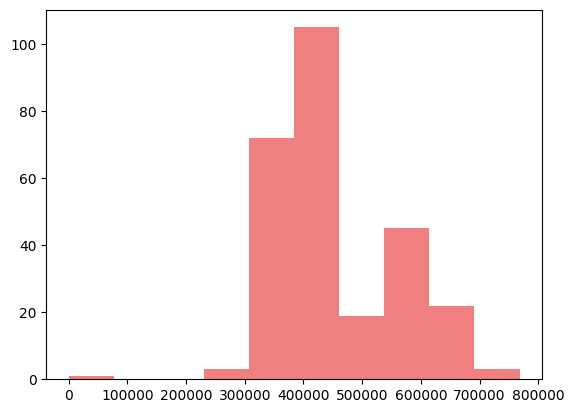

In [95]:
plt.hist(consumes.Gasolinasuperior, color="lightcoral")


(array([ 1.,  0.,  0., 11., 74., 80., 41., 38., 19.,  6.]),
 array([0.0, 142788.803, 285577.606, 428366.40900000004, 571155.212,
        713944.0150000001, 856732.8180000001, 999521.621, 1142310.424,
        1285099.2270000002, 1427888.03], dtype=object),
 <BarContainer object of 10 artists>)

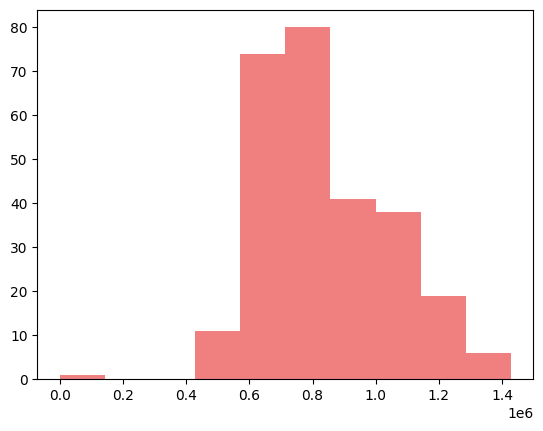

In [96]:
plt.hist(consumes.Diesel, color="lightcoral")

c:\Users\aeqv2\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\aeqv2\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 8., 52., 63., 35., 26., 31., 16., 15., 10.,  8.]),
 array([0.0, 90610.405, 181220.81, 271831.21499999997, 362441.62,
        453052.025, 543662.4299999999, 634272.835, 724883.24, 815493.645,
        906104.05], dtype=object),
 <BarContainer object of 10 artists>)

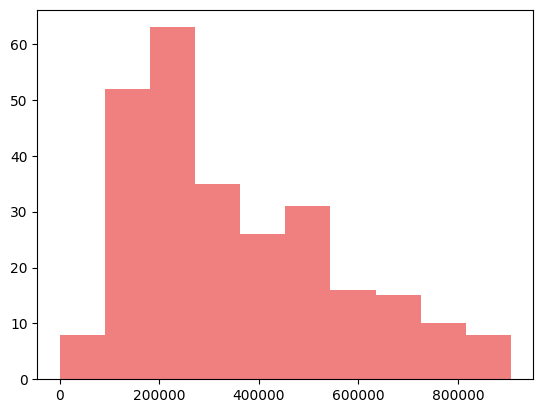

In [97]:
plt.hist(imports.Gasolinaregular, color="lightcoral")

(array([ 7.,  8., 63., 74., 60., 41.,  9.,  1.,  0.,  1.]),
 array([0.0, 122717.353, 245434.706, 368152.059, 490869.412, 613586.765,
        736304.118, 859021.471, 981738.824, 1104456.1770000001, 1227173.53],
       dtype=object),
 <BarContainer object of 10 artists>)

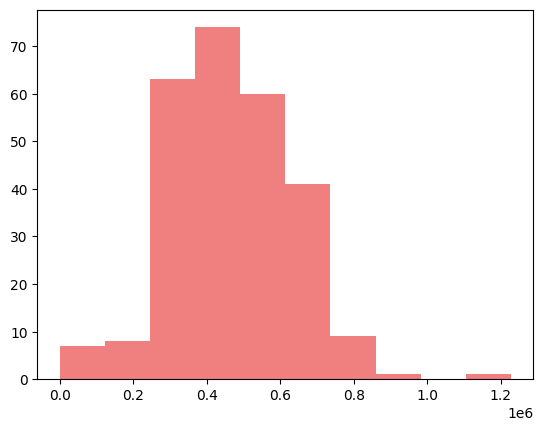

In [98]:
plt.hist(imports.Gasolinasuperior, color="lightcoral")

(array([ 7.,  3., 18., 40., 66., 54., 33., 28., 10.,  5.]),
 array([0.0, 163063.564, 326127.128, 489190.69200000004, 652254.256,
        815317.8200000001, 978381.3840000001, 1141444.948, 1304508.512,
        1467572.0760000001, 1630635.6400000001], dtype=object),
 <BarContainer object of 10 artists>)

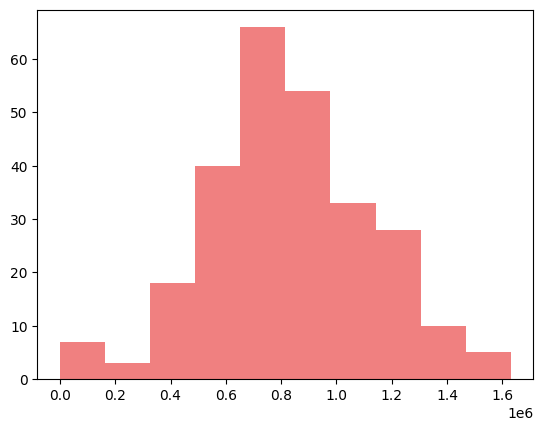

In [99]:
plt.hist(imports.Diesel, color="lightcoral")

In [100]:
print(IMPORT.head())

  Unnamed: 0      Fecha Gasolinasuperior Gasolinaregular Total\ngasolinas  \
0        NaN 2001-01-01        373963.96        177776.5        551740.46   
1        NaN 2001-02-01        243091.07       123115.99        366207.06   
2        NaN 2001-03-01        312084.38       161726.42         473810.8   
3        NaN 2001-04-01        285054.89       127338.74        412393.63   
4        NaN 2001-05-01        300913.67       168730.19        469643.86   

  Diesel alto azufre Diesel bajo azufre Diesel ultra bajo azufre     Diesel  \
0          566101.99                  0                        0  566101.99   
1           489525.8                  0                        0   489525.8   
2          575559.68                  0                        0  575559.68   
3          437745.42                  0                        0  437745.42   
4          552609.13                  0                        0  552609.13   

  Gas licuado de petróleo  ... Solventes Naftas Ceras Butano  

In [101]:
cols=["Fecha"]
IMPORT['date'] = pd.to_datetime(IMPORT[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns"), format='%Y-%m', errors='ignore')
CONSUME['date'] = pd.to_datetime(CONSUME[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns"))

SERIES CONFORME TIEMPO

Podemos apreciar que cada una de las graficas posee una tendencia, por lo cual no es constante en la media. Los consumos e importacion desde el año 2001 parace ir en aumento conforme los el tiempo. 

Se puede apreciar que los datasets poseen estacionalidad, sin embargo, la varianza en este caso parece no ser constante. 

Para las series de tiempo de importacion podemos apreciar que estas oscilan con mayor frecuencia y de una forma mas variada.

SERIES DE TIEMPO CONSUMOS

<AxesSubplot:xlabel='date'>

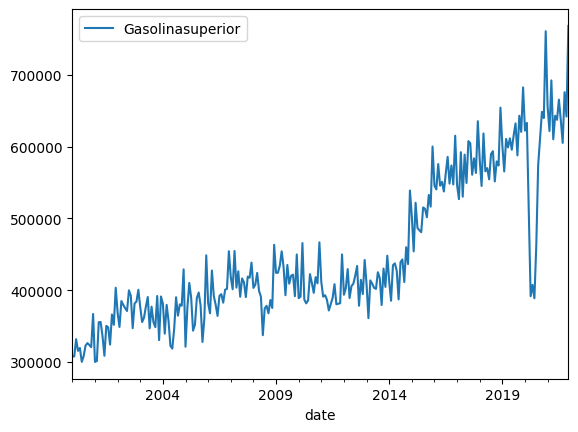

In [102]:
CONSUME.plot(x='date', y='Gasolinasuperior', style='-')

<AxesSubplot:xlabel='date'>

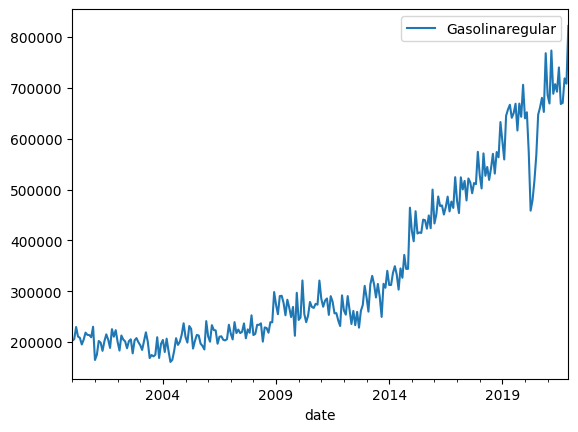

In [103]:
CONSUME.plot(x='date', y='Gasolinaregular', style='-')

<AxesSubplot:xlabel='date'>

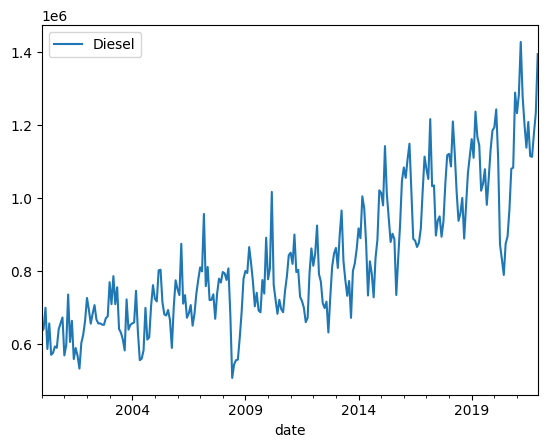

In [104]:
CONSUME.plot(x='date', y='Diesel', style='-')

SERIES DE IMPORTACION 

<AxesSubplot:xlabel='date'>

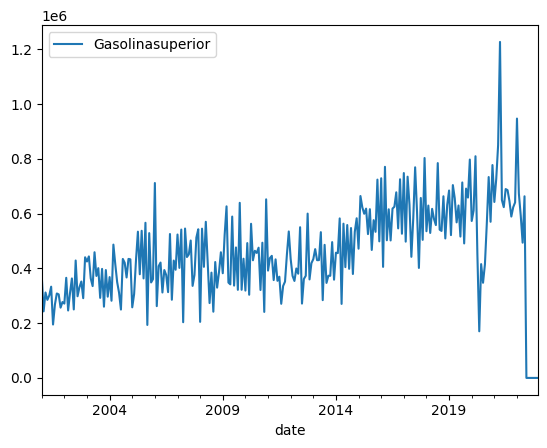

In [105]:
IMPORT.plot(x='date', y='Gasolinasuperior', style='-')

<AxesSubplot:xlabel='date'>

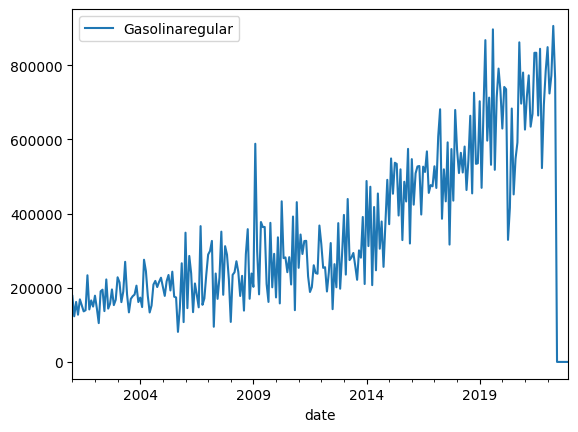

In [106]:
IMPORT.plot(x='date', y='Gasolinaregular', style='-')

<AxesSubplot:xlabel='date'>

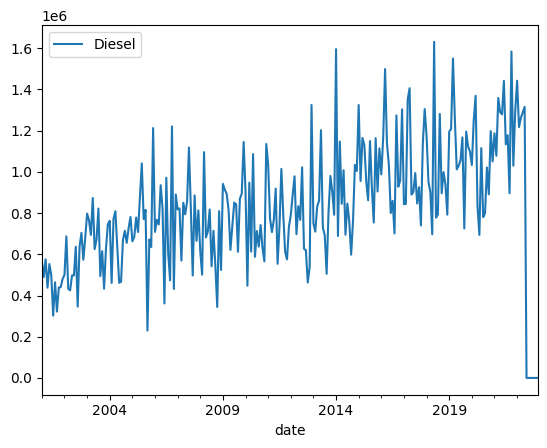

In [107]:
IMPORT.plot(x='date', y='Diesel', style='-')

CONJUNTO DE ENTRENAMIENTO Y DICK FULLER

Prueba de Dickey-Fuller para las gasolinas

In [108]:
train = int(len(consumes) * 0.7)
entrenamientoConsumo = consumes[0:train]
PruebaConsumo = consumes[train:len(consumes)]
entrenamientoConsumo = entrenamientoConsumo.set_index(['Fecha'])
PruebaConsumo = PruebaConsumo.set_index(['Fecha'])

In [109]:
testRegular = entrenamientoConsumo['Gasolinaregular']


testSuper = entrenamientoConsumo['Gasolinasuperior']


testDiesel = entrenamientoConsumo['Diesel']


In [110]:
dfTest = adfuller(testRegular, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Valor Crítico (%s)'%key] = value
print(salidaDf)

Estadístico de prueba          2.108943
p-value                        0.998799
# de retardos usados          12.000000
# de observaciones usadas    176.000000
Valor Crítico (1%)            -3.468062
Valor Crítico (5%)            -2.878106
Valor Crítico (10%)           -2.575602
dtype: float64


In [111]:
dfTest = adfuller(testSuper, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Valor Crítico (%s)'%key] = value
print(salidaDf)

Estadístico de prueba         -0.390747
p-value                        0.911632
# de retardos usados          12.000000
# de observaciones usadas    176.000000
Valor Crítico (1%)            -3.468062
Valor Crítico (5%)            -2.878106
Valor Crítico (10%)           -2.575602
dtype: float64


In [112]:
dfTest = adfuller(testDiesel, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Valor Crítico (%s)'%key] = value
print(salidaDf)

Estadístico de prueba         -0.417058
p-value                        0.907212
# de retardos usados          12.000000
# de observaciones usadas    176.000000
Valor Crítico (1%)            -3.468062
Valor Crítico (5%)            -2.878106
Valor Crítico (10%)           -2.575602
dtype: float64


Podemos ver que en los p-values obtuvimos todos mayores a 0.05 debido a esto, no se rechaza la hipotesis nula de la existencia de raices unitarias. Podemos concluir que la serie no es estacionaria en media.

Procedemos a descomponer en componentes:
REF:
https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

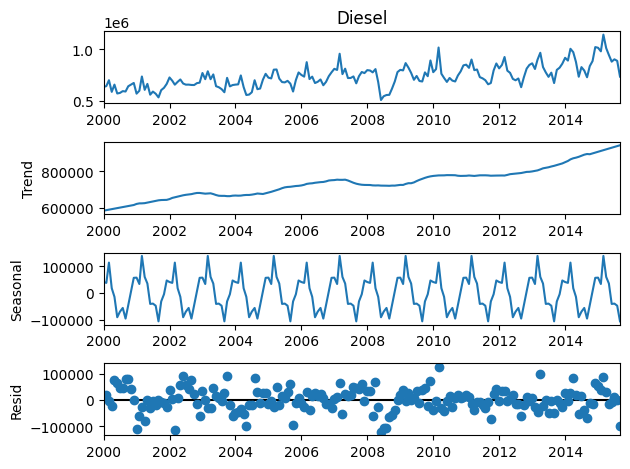

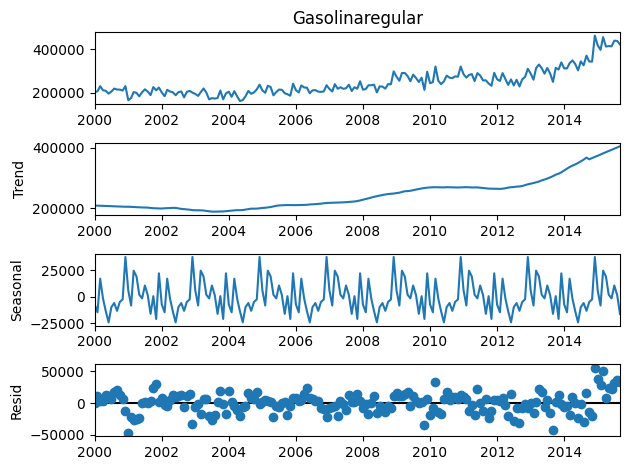

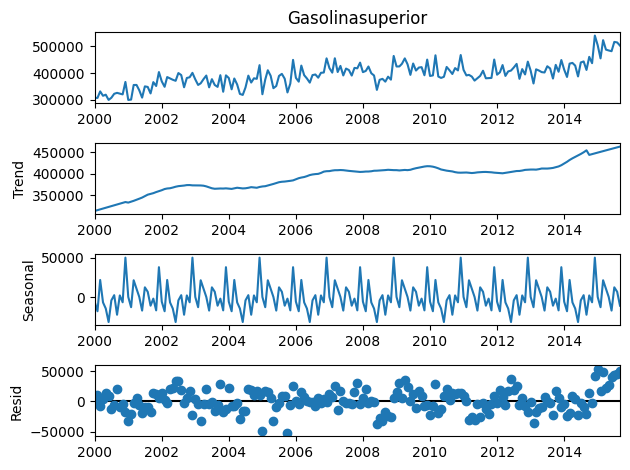

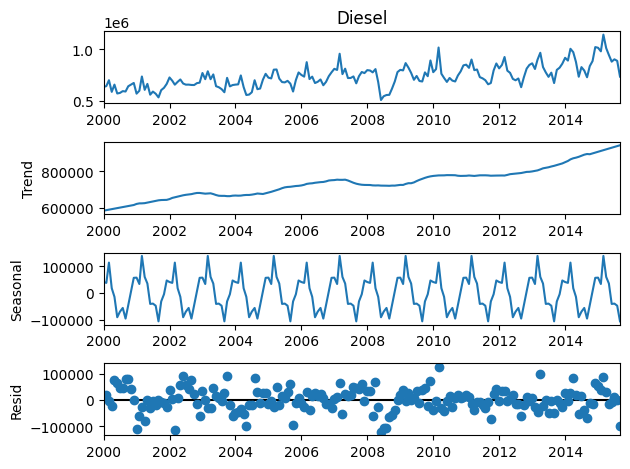

In [113]:
DeCompose = seasonal_decompose(testRegular, model='additive' , period=24,  two_sided=True, extrapolate_trend='freq') 
DeCompose.plot()
DeCompose = seasonal_decompose(testSuper,  model='additive' , period=24,  two_sided=True, extrapolate_trend='freq')
DeCompose.plot()
DeCompose = seasonal_decompose(testDiesel, model='additive' , period=24,  two_sided=True, extrapolate_trend='freq')
DeCompose.plot()

Media y desviacion estandar para la gasolina super, regular y diesel

In [114]:
td = entrenamientoConsumo['Diesel']
media = td.rolling(window=12).mean()
DesviacionE = td.rolling(window=12).std()

ts = entrenamientoConsumo['Gasolinasuperior']
media = ts.rolling(window=12).mean()
DesviacionE = ts.rolling(window=12).std()

tr = entrenamientoConsumo['Gasolinaregular']
media = tr.rolling(window=12).mean()
DesviacionE = tr.rolling(window=12).std()

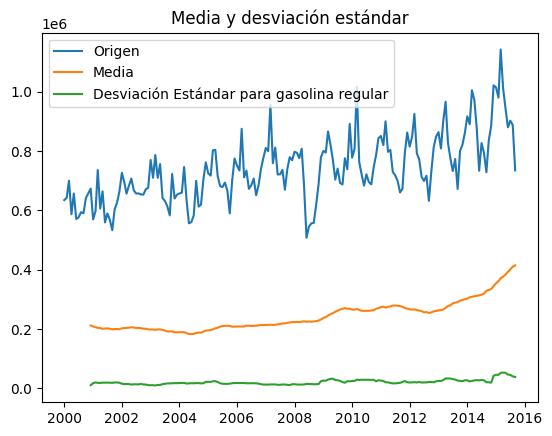

In [115]:
Origen = plt.plot(td, label="Origen")
media = plt.plot(media, label = 'Media')
DE = plt.plot(DesviacionE, label = 'Desviación Estándar para gasolina regular')
plt.title('Media y desviación estándar')
plt.legend(loc='best')

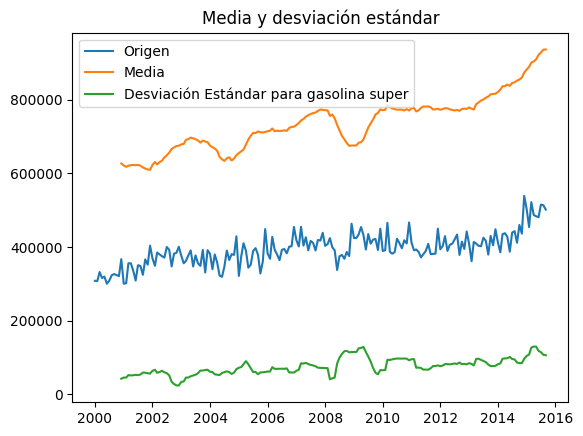

In [116]:
Origen = plt.plot(testSuper, label="Origen")
media = plt.plot(mediaMovil, label = 'Media')
DE = plt.plot(deMovil, label = 'Desviación Estándar para gasolina super')
plt.title('Media y desviación estándar')
plt.legend(loc='best')


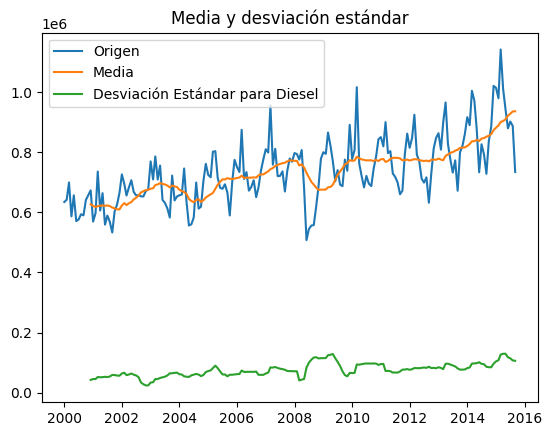

In [117]:
Origen = plt.plot(testDiesel, label="Origen")
media = plt.plot(mediaMovil, label = 'Media')
DE = plt.plot(deMovil, label = 'Desviación Estándar para Diesel')
plt.title('Media y desviación estándar')
plt.legend(loc='best')